# Ensemble Learning

- It is an advanced machine learning technique where multiple models/algorithms are combined to improve the accuracy and robustness of the predictions.
- The main idea here is to leverage the strengths of individual models and reduce their weaknesses by combining their predictions.
- There are three main types:
    - **Bagging** (short for **B**ootstrap **Agg**regation)
        - It works by training multiple copies of the same model on different subsets of the training data
        - This is done by sampling the training data with replacement and oversampling, which means some data is included in multiple models and some is synthetic 
        - The architecture is parallel
        - It helps reduce the variance of the model, which can improve accuracy and reduce overfitting.
    - **Boosting**
        - It works by training multiple models sequentially
        - Each model is focuses on learning from the previous model's errors (boosting here comes from boosting accuracy)
        - The architecture is sequential
        - It helps reduce the bias of the model, which can improve accuracy and reduce underfitting.
    - **Stacking**
        - It's the most complex form of Ensemble Learning
        - It works by combining multiple different models/algorithms (base learners)
        - The output of all the models is combined to make up the training data for the final modle (called Meta Model)
        - The architecture is multiple base learners in parallel followed by the meta model
        - It helps improve both overfitting and underfitting. It can achieve better outcome than Boosting and Bagging, but it's computationally costly 


![BaggingBoosting](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*zTgGBTQIMlASWm5QuS2UpA.jpeg)

## Bagging

![bg](https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
url="http://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diabetes']


df = pd.read_csv(url, names=col_names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Prep the data

#### X and y Split

In [3]:
X = df.drop(columns='diabetes', axis=1)
y = df['diabetes']

#### Cross Validation and Model Definition

In [4]:
kfold = KFold(n_splits=10)

In [5]:
dtc_model = DecisionTreeClassifier()
#hyperparameter for the number of learners
num_trees = 100

### Deploy The Bagging Classifier with Cross-Validation

In [6]:
bc_model = BaggingClassifier(estimator=dtc_model, n_estimators=num_trees, random_state=12)

In [7]:
results = cross_val_score(bc_model, X, y, cv=kfold)
results

array([0.64935065, 0.83116883, 0.75324675, 0.66233766, 0.77922078,
       0.83116883, 0.83116883, 0.83116883, 0.71052632, 0.78947368])

To get the final accuracy score, you need to take the average

In [8]:
results.mean()

0.7668831168831168

- You can choose any type of estimator (algorithm) for `BaggingClassifier`. 
- Recommended models that work well with Ensemble Bagging:
    - Decision Tree Classifier
    - Logistic Regression
    - SVC
    - K Neighbors Classifier

> To use the learning after Corss-Validation, once you're happy with the outcome, you need to fit the model again on the full dataset, not need to split by train and test.

## Boosting

![seq](https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png)

![gradientboosting](https://www.researchgate.net/publication/356698772/figure/fig2/AS:1096436418641951@1638422221975/The-architecture-of-Gradient-Boosting-Decision-Tree.png)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

In [10]:
gbc_model = GradientBoostingClassifier(n_estimators=100 #count of trees 
                                       , learning_rate=0.1 #contribution of each tree (learning from errors rate)
                                       , max_depth=3) #depth of each tree in the boosting algorithm

In [11]:
kfold = StratifiedKFold(n_splits=8, random_state=20
                        , shuffle=True) #it shuffles data before splitting in case your data is sorted originally

In [12]:
results = cross_val_score(gbc_model, X, y, cv=kfold, scoring='accuracy')
results

array([0.76041667, 0.77083333, 0.70833333, 0.75      , 0.76041667,
       0.71875   , 0.80208333, 0.77083333])

In [13]:
results.mean()

0.7552083333333333

In [15]:
results = cross_val_score(bc_model, X, y, cv=kfold, scoring='f1')
results.mean()

0.6415487737805301

For different score types

In [14]:
scoring_types = ['precision_macro', 'recall_macro']

scores = cross_validate(gbc_model, X, y, scoring=scoring_types, cv=kfold)
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [15]:
scores

{'fit_time': array([0.07315588, 0.07372117, 0.07660604, 0.070683  , 0.07115698,
        0.07305789, 0.07365799, 0.07724309]),
 'score_time': array([0.00239992, 0.00264025, 0.00161195, 0.00149512, 0.00130486,
        0.00145793, 0.00137496, 0.0015471 ]),
 'test_precision_macro': array([0.76118326, 0.77149877, 0.67857143, 0.74034997, 0.73484848,
        0.6875    , 0.78676471, 0.74640199]),
 'test_recall_macro': array([0.75759013, 0.70967742, 0.66129032, 0.721537  , 0.72366522,
        0.68470418, 0.76262626, 0.73881674])}

## AUC ROC

- AUC: Area Under the Curve & ROC: Receiver Operating Characteristic Curve
- AUC-ROC is a widely used evaluation method mainly for binary classification
- It's also useful for comparing the performance across different models
 

![auc](https://miro.medium.com/v2/resize:fit:1358/1*Bgc9QOjhnL70g2SQxyj6hQ.png)

## Exercise:
using the same diabetes dataset, build a process that deploys 4 different ensemble learning models and evaluates the best model based on AUC-ROC Curve.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [17]:
plt.style.use('ggplot')

1. Define multiple Ensemble models and cross validation method

In [18]:

models = {
    #Bagging
    'BaggingLogReg': BaggingClassifier(estimator=LogisticRegression(), n_estimators=100), 
    'RandomForest': RandomForestClassifier(n_estimators=100),
    #Boosting
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100), 
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100)

}

In [19]:
cv_method = StratifiedKFold(n_splits=8, shuffle=True, random_state=12)

2. Automate training, cross-validation, plotting

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

BaggingLogReg: AUC-ROC = 0.8270671641791044
RandomForest: AUC-ROC = 0.824865671641791
AdaBoost: AUC-ROC = 0.6712388059701493
GradientBoosting: AUC-ROC = 0.835544776119403


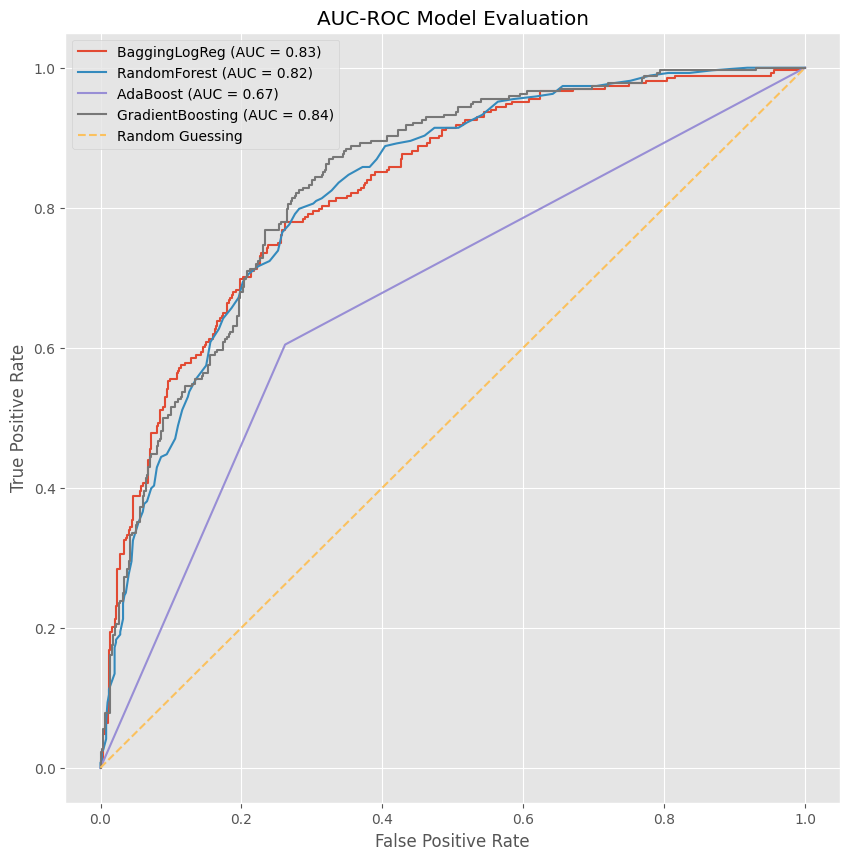

In [20]:
plt.figure(figsize=(10,10))
for name, model in models.items():
    #cross validation predictions
    y_pred_proba = cross_val_predict(model, X, y, cv=cv_method, method='predict_proba')[:,1]

    #calculate the auc score and curve
    auc = roc_auc_score(y, y_pred_proba)
    print(f'{name}: AUC-ROC = {auc}')

    # false positive rate and true positive rate
    fpr, tpr, thresh = roc_curve(y, y_pred_proba)

    #build the plot for each curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')


#add the diagonal line
plt.plot([0,1], [0,1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Model Evaluation')
plt.legend()


**Observation**
- AdaBoost model performed the worst (closest to the Random Guessing diagonal line)
- GRadientBoosting performed the best (the rest were very close)

Without Cross-Validation

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

BaggingLogReg: AUC-ROC = 0.8268135904499541
RandomForest: AUC-ROC = 0.836455463728191
AdaBoost: AUC-ROC = 0.7656565656565657
GradientBoosting: AUC-ROC = 0.8514233241505968


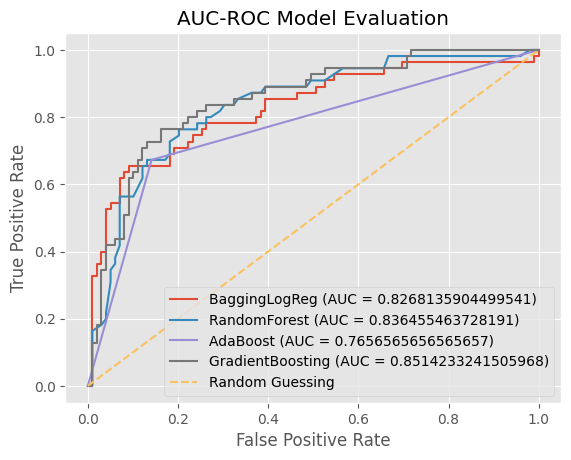

In [22]:
for name, model in models.items():
    #model fit
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    #calculate the auc score and curve
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f'{name}: AUC-ROC = {auc}')

    # false positive rate and true positive rate
    fpr, tpr, thresh = roc_curve(y_test, y_pred_proba)

    #build the plot for each curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc})')


#add the diagonal line
plt.plot([0,1], [0,1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Model Evaluation')
plt.legend()


#### Choosing the Optimatl

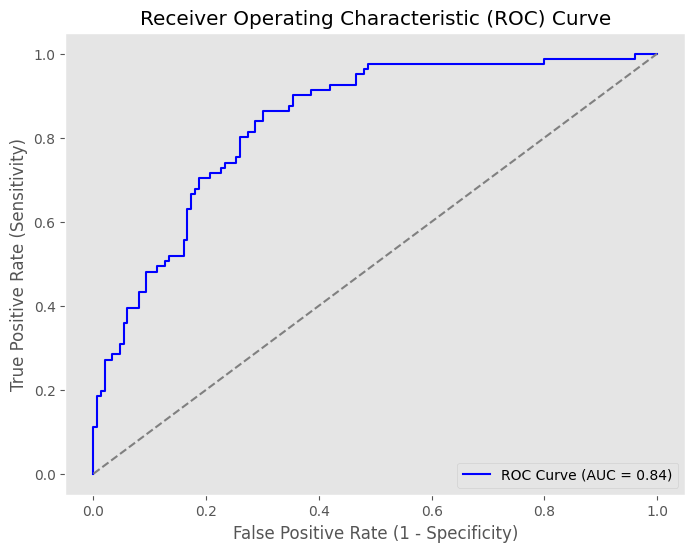

Optimal Threshold: 0.26
Confusion Matrix:
[[105  45]
 [ 11  70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       150
           1       0.61      0.86      0.71        81

    accuracy                           0.76       231
   macro avg       0.76      0.78      0.75       231
weighted avg       0.80      0.76      0.76       231



In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Find the optimal threshold using Youden's J statistic (best balance between TPR and FPR)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold:.2f}')

# Classify using the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the performance with the new threshold
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_optimal))

print('\nClassification Report:')
print(classification_report(y_test, y_pred_optimal))
